In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame as df
import math

In [2]:
dams = {
    "Hinze" : {
        "Area_km2" : 9.7,
        "Depth_m" : 43,
        "Volume_ML" : 310_730,
    },
    "Hume" : {
        "Area_km2" : 201.9,
        "Depth_m" : 40,
        "Volume_ML" : 3_005_156,        
    },
    "Dartmouth" : {
        "Area_km2" : 63.00,
        "Depth_m" : 180,
        "Volume_ML" : 3_856_000, 
    },
    "Pindari" : {
        "Area_km2" : 10.5,
        "Depth_m" : 73,
        "Volume_ML" : 312_000,
    },
    "Borumba" : {
        "Area_km2" : 4.80,
        "Depth_m" : 25,
        "Volume_ML" : 46_000,
    }
}

df_dams = pd.DataFrame.from_dict(dams, orient="index")
df_dams["Volume_ML_calc"] = 1000.0 * df_dams["Depth_m"] * df_dams["Area_km2"] / 3.0
df_dams

,Area_km2,Depth_m,Volume_ML,Volume_ML_calc
Hinze,9.7,43,310730,1.390333e+05
Hume,201.9,40,3005156,2.692000e+06
Dartmouth,63.0,180,3856000,3.780000e+06
Pindari,10.5,73,312000,2.555000e+05
Borumba,4.8,25,46000,4.000000e+04


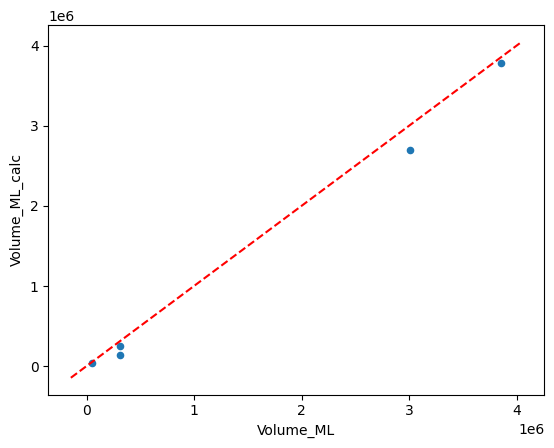

In [3]:
ax = df_dams.plot.scatter(x = "Volume_ML", y = "Volume_ML_calc")

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Find the common range for the 1:1 line
line_start = min(xmin, ymin)
line_end = max(xmax, ymax)

# Plot the 1:1 line
ax.plot([line_start, line_end], [line_start, line_end], color='red', linestyle='--', label='1:1 Line')

# What if the VOLUME and AREA is known? 

## How do we reconstruct the curve from there?

In [4]:
# Height can be calculated
df_dams = pd.DataFrame.from_dict(dams, orient="index")
df_dams

,Area_km2,Depth_m,Volume_ML
Hinze,9.7,43,310730
Hume,201.9,40,3005156
Dartmouth,63.0,180,3856000
Pindari,10.5,73,312000
Borumba,4.8,25,46000


In [7]:
def pyramid_dims(fs_volume, fs_area, volume):
    fs_level = 3.0 * (fs_volume / 1000.0) / fs_area
    level = math.sqrt(3.0 * (volume / 1000.0) * (fs_level / fs_area))
    area = 3.0 * (volume / 1000.0) / level if (volume > 0) else 0
    return((level, volume, area))

def generate_lvas(fs_volume, fs_area):
    BIG_VOL = 1e9
    BIG_SPILL = 1e9
    answer = "Level [m], Volume [ML], Area [km2], Spill [ML],\n"
    for v, s in [(0, 0), (fs_volume, 0), (fs_volume+1, BIG_SPILL), (BIG_VOL, BIG_SPILL)]:
        (level, _, area) = pyramid_dims(fs_volume, fs_area, v)
        answer += f"    {level}, {v}, {area}, {s},\n"
    return answer

In [8]:
print(generate_lvas(3005156, 201.9))

Level [m], Volume [ML], Area [km2], Spill [ML],
    0.0, 0, 0, 0,
    44.6531352154532, 3005156, 201.9, 0,
    44.653142644873085, 3005157, 201.9000335922633, 1000000000.0,
    814.5513100979983, 1000000000.0, 3683.0092381032096, 1000000000.0,



In [10]:
print(generate_lvas(10000, 3))

Level [m], Volume [ML], Area [km2], Spill [ML],
    0.0, 0, 0, 0,
    10.0, 10000, 3.0, 0,
    10.000499987500625, 10001, 3.0001499962501876, 1000000000.0,
    3162.2776601683795, 1000000000.0, 948.6832980505137, 1000000000.0,

